In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sps
import matplotlib.pyplot as pyplot

from Evaluation.Evaluator import EvaluatorHoldout
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample
from Utils.DataReader import load_urm, load_icm, load_target
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample

In [2]:
URM_all = load_urm()

URM_train, URM_test = split_train_in_two_percentage_global_sample(URM_all, train_percentage = 0.85)
URM_train, URM_validation = split_train_in_two_percentage_global_sample(URM_train, train_percentage = 0.85)

evaluator_validation = EvaluatorHoldout(URM_validation, cutoff_list=[10])
evaluator_test = EvaluatorHoldout(URM_test, cutoff_list=[10])

EvaluatorHoldout: Ignoring 1488 ( 3.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions


In [3]:
URM_all

<41629x24507 sparse matrix of type '<class 'numpy.int32'>'
	with 1554640 stored elements in Compressed Sparse Row format>

In [4]:
ICM_all = load_icm()
ICM_all

<27968x1 sparse matrix of type '<class 'numpy.int32'>'
	with 23090 stored elements in Compressed Sparse Row format>

In [5]:
profile_length = np.ediff1d(sps.csr_matrix(URM_train).indptr)
profile_length, profile_length.shape

(array([43, 15, 80, ..., 14, 39, 14], dtype=int32), (41629,))

In [6]:
block_size = int(len(profile_length)*0.05)
block_size

2081

In [7]:
sorted_users = np.argsort(profile_length)
sorted_users

array([28625, 10587, 38434, ..., 19407,  8693, 12454])

In [8]:
for group_id in range(0, 5):
    start_pos = group_id * block_size
    end_pos = min((group_id+1) * block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 2081, average p.len 8.57, median 9.0, min 2, max 10
Group 1, #users in group 2081, average p.len 11.13, median 11.0, min 10, max 12
Group 2, #users in group 2081, average p.len 12.54, median 13.0, min 12, max 13
Group 3, #users in group 2081, average p.len 13.69, median 14.0, min 13, max 14
Group 4, #users in group 2081, average p.len 14.74, median 15.0, min 14, max 15
Group 5, #users in group 2081, average p.len 15.75, median 16.0, min 15, max 16
Group 6, #users in group 2081, average p.len 16.80, median 17.0, min 16, max 17
Group 7, #users in group 2081, average p.len 17.81, median 18.0, min 17, max 18
Group 8, #users in group 2081, average p.len 18.94, median 19.0, min 18, max 20
Group 9, #users in group 2081, average p.len 20.24, median 20.0, min 20, max 21
Group 10, #users in group 2081, average p.len 21.45, median 21.0, min 21, max 22
Group 11, #users in group 2081, average p.len 22.95, median 23.0, min 22, max 24
Group 12, #users in group 2081, average p

In [11]:
#here we will save MAPs of different user groups
MAP_recommender_per_group = {}

#here we will save pairs label : recommender_object
recommender_object_dict = {}

## Recommenders to try:

In [ ]:
from Recommenders.BaseCBFRecommender import BaseItemCBFRecommender
from Recommenders.Hybrids.HybridRatings_EASE_R_hybrid_SLIM_Rp3 import HybridRatings_EASE_R_hybrid_SLIM_Rp3
from Recommenders.Hybrids.HybridRatings_IALS_hybrid_EASE_R_hybrid_SLIM_Rp3 import \
    HybridRatings_IALS_hybrid_EASE_R_hybrid_SLIM_Rp3
from Recommenders.Hybrids.HybridRatings_PureSVD_EASE_R import HybridRatings_PureSVD_EASE_R
from Recommenders.Hybrids.HybridRatings_SLIM_EASE_R_PureSVD import HybridRatings_SLIM_PureSVD_EASE_R
from Recommenders.Hybrids.HybridRatings_SLIM_Rp3 import HybridRatings_SLIM_Rp3
from Recommenders.Hybrids.HybridSimilarity_SLIM_Rp3 import HybridSimilarity_SLIM_Rp3
from Recommenders.Hybrids.HybridSimilarity_withGroupedUsers import HybridSimilarity_withGroupedusers
from Recommenders.Hybrids.Hybrid_SLIM_EASE_R_IALS import Hybrid_SLIM_EASE_R_IALS
from Recommenders.Hybrids.Hybrid_SlimElastic_Rp3 import Hybrid_SlimElastic_Rp3
from Recommenders.Hybrids.Hybrid_SlimElastic_Rp3_PureSVD import Hybrid_SlimElastic_Rp3_PureSVD
from Recommenders.Hybrids.scores.ScoresHybridRP3betaKNNCBF import ScoresHybridRP3betaKNNCBF
from Recommenders.Recommender_import_list import *

recommender_class_list = [
    # UserKNNCBFRecommender, # UCM needed
    # ItemKNNCBFRecommender,
    # ItemKNNCBFWeightedSimilarityRecommender,  # new
    # UserKNN_CFCBF_Hybrid_Recommender, # UCM needed
    # ItemKNN_CFCBF_Hybrid_Recommender,
    SLIMElasticNetRecommender,  # too slow to train
    # UserKNNCFRecommender,
    IALSRecommender,
    # IALSRecommender_implicit,
    # MatrixFactorization_BPR_Cython,
    # MatrixFactorization_FunkSVD_Cython, # fix low values
    # MatrixFactorization_AsySVD_Cython, # fix low values
    # EASE_R_Recommender,
    ItemKNNCFRecommender,
    # P3alphaRecommender,
    # SLIM_BPR_Cython,
    RP3betaRecommender,
    # PureSVDRecommender,
    # PureSVDItemRecommender
    # NMFRecommender,

    LightFMCFRecommender,
    LightFMItemHybridRecommender,

    Hybrid_SlimElastic_Rp3,
    Hybrid_SlimElastic_Rp3_PureSVD,
    Hybrid_SLIM_EASE_R_IALS,

    HybridSimilarity_SLIM_Rp3,
    HybridSimilarity_withGroupedusers,

    HybridRatings_SLIM_Rp3,
    HybridRatings_EASE_R_hybrid_SLIM_Rp3,
    HybridRatings_SLIM_PureSVD_EASE_R,
    HybridRatings_IALS_hybrid_EASE_R_hybrid_SLIM_Rp3,

    ScoresHybridRP3betaKNNCBF
]

In [ ]:
def _get_instance(recommender_class, URM_train, ICM=None):
    if issubclass(recommender_class, BaseItemCBFRecommender) or issubclass(recommender_class,
                                                                           ScoresHybridRP3betaKNNCBF):
        recommender_object = recommender_class(URM_train, ICM)
    else:
        recommender_object = recommender_class(URM_train)

    return recommender_object

In [ ]:
def _get_params(recommender_object):
    if isinstance(recommender_object, ItemKNNCFRecommender):
        fit_params = {'topK': 100, 'shrink': 5, 'similarity': 'cosine', 'normalize': True,
                      'feature_weighting': 'TF-IDF'} #updated by LP
    elif isinstance(recommender_object, ItemKNNCBFRecommender):
        fit_params = {'topK': 1000, 'shrink': 1000, 'similarity': 'cosine', 'normalize': False,
                      'feature_weighting': 'TF-IDF'}
    elif isinstance(recommender_object, SLIMElasticNetRecommender):
        fit_params = {"topK": 405, 'l1_ratio': 0.0010299956370568744, 'alpha': 0.01} #updated by LP
    elif isinstance(recommender_object, IALSRecommender):
        fit_params = {'n_factors': 50, 'regularization': 0.001847510119137634}
    elif isinstance(recommender_object, RP3betaRecommender):
        fit_params = {'alpha':0.08934428697754494, 'beta':0.15025275671838492, 'topK':132, 'implicit':False} #updated by LP
    elif isinstance(recommender_object, MultVAERecommender):
        fit_params = {'topK': 615, 'l1_ratio': 0.007030044688343361, 'alpha': 0.07010526286528686}
    elif isinstance(recommender_object, Hybrid_SlimElastic_Rp3):
        fit_params = {'alpha': 0.9}
    elif isinstance(recommender_object, HybridRatings_SLIM_Rp3):
        fit_params = {'alpha': 0.9}
    elif isinstance(recommender_object, HybridSimilarity_SLIM_Rp3):
        fit_params = {'alpha': 0.9610229519605884, 'topK': 1199}
    elif isinstance(recommender_object, HybridSimilarity_withGroupedusers):
        fit_params = {'alpha': 0.979326712891909, 'topK': 1349}
    elif isinstance(recommender_object, PureSVDRecommender):
        fit_params = {'num_factors': 28, 'random_seed': 0}
    elif isinstance(recommender_object, Hybrid_SlimElastic_Rp3_PureSVD):
        fit_params = {'alpha': 0.95, 'beta': 0.1, 'gamma': 0.1}
    elif isinstance(recommender_object, HybridRatings_EASE_R_hybrid_SLIM_Rp3):
        fit_params = {'alpha': 0.9610229519605884}
    elif isinstance(recommender_object, HybridRatings_PureSVD_EASE_R):
        fit_params = {'alpha': 0.5}
    elif isinstance(recommender_object, HybridRatings_SLIM_PureSVD_EASE_R):
        fit_params = {'alpha': 0.95}
    elif isinstance(recommender_object, Hybrid_SLIM_EASE_R_IALS):
        fit_params = {'alpha': 0.3815016492157693, 'beta': 0.5802064204762605, 'gamma': 0.06145838241599496}
    elif isinstance(recommender_object, HybridRatings_EASE_R_hybrid_SLIM_Rp3):
        fit_params = {'alpha': 0.95}
    elif isinstance(recommender_object, HybridRatings_IALS_hybrid_EASE_R_hybrid_SLIM_Rp3):
        # Average 5-fold MAP: 0.2480472, diff: 0.0020975
        fit_params = {'alpha': 0.9560759641998946, 'beta': 0.7550858561550403, 'gamma': 0.5227204586158875,
                      'alpha1': 0.9739242060693925, 'beta1': 0.32744235125291515, 'topK1': 837}
    else:
        fit_params = {}

    return fit_params

In [ ]:
for recommender_class in recommender_class_list:

    print("Algorithm: {}".format(recommender_class.RECOMMENDER_NAME))

    recommender_object = _get_instance(recommender_class, URM_train)
    fit_params = _get_params(recommender_object)
    recommender_object.fit(**fit_params)

## Plot results of models for different users groups

In [18]:
# here we perform validation over different user groups for each model
# then we plot a graph to compare them
cutoff = 10

for group_id in range(0, 5):

    start_pos = group_id*block_size
    end_pos = min((group_id+1)*block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        users_in_group.shape[0],
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))


    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]

    evaluator_validation = EvaluatorHoldout(URM_test, cutoff_list=[cutoff], ignore_users=users_not_in_group)

    for label, recommender in recommender_object_dict.items():
        result_df, _ = evaluator_validation.evaluateRecommender(recommender)
        if label in MAP_recommender_per_group:
            MAP_recommender_per_group[label].append(result_df.loc[cutoff]["MAP"])
        else:
            MAP_recommender_per_group[label] = [result_df.loc[cutoff]["MAP"]]

Group 0, #users in group 2081, average p.len 8.57, median 9.0, min 2, max 10
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1984 (100.0%) in 1.31 sec. Users per second: 1517
EvaluatorHoldout: Processed 1984 (100.0%) in 0.95 sec. Users per second: 2089
EvaluatorHoldout: Processed 1984 (100.0%) in 1.23 sec. Users per second: 1619
EvaluatorHoldout: Processed 1984 (100.0%) in 1.31 sec. Users per second: 1518
EvaluatorHoldout: Processed 1984 (100.0%) in 1.18 sec. Users per second: 1681
Group 1, #users in group 2081, average p.len 11.13, median 11.0, min 10, max 12
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 1978 (100.0%) in 1.34 sec. Users per second: 1474
EvaluatorHoldout: Processed 1978 (100.0%) in 0.93 sec. Users per second: 2123
EvaluatorHoldout: Processed 1978 (100.0%) in 1.36

EvaluatorHoldout: Processed 2062 (100.0%) in 1.21 sec. Users per second: 1699
Group 14, #users in group 2081, average p.len 29.26, median 29.0, min 28, max 31
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2069 (100.0%) in 1.40 sec. Users per second: 1476
EvaluatorHoldout: Processed 2069 (100.0%) in 1.14 sec. Users per second: 1821
EvaluatorHoldout: Processed 2069 (100.0%) in 1.26 sec. Users per second: 1641
EvaluatorHoldout: Processed 2069 (100.0%) in 1.94 sec. Users per second: 1067
EvaluatorHoldout: Processed 2069 (100.0%) in 1.12 sec. Users per second: 1844
Group 15, #users in group 2081, average p.len 32.51, median 32.0, min 31, max 34
EvaluatorHoldout: Ignoring 927 ( 2.2%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 39548 Users
EvaluatorHoldout: Processed 2069 (100.0%) in 1.29 sec. Users per second: 1608
EvaluatorHoldout: Processed 2069 (100.0%) in

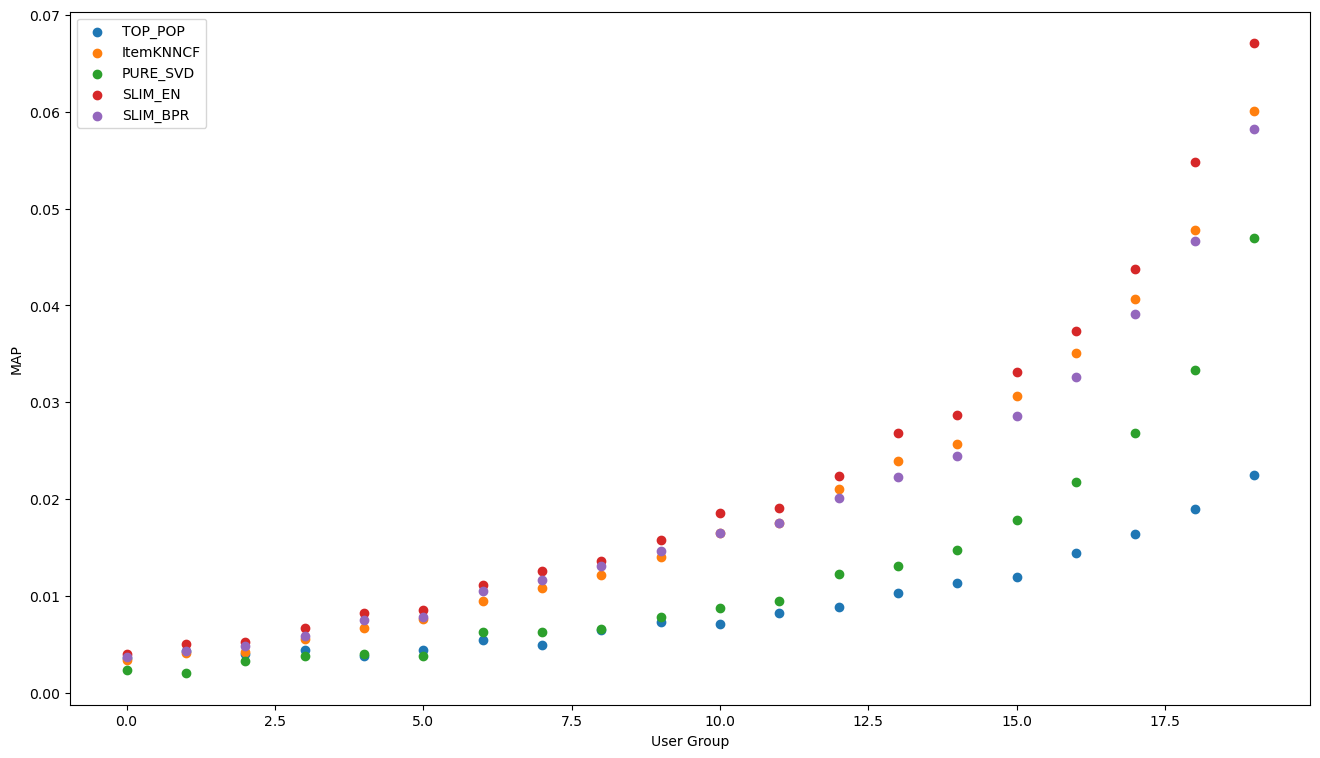

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.figure(figsize=(16, 9))
for label, recommender in recommender_object_dict.items():
    results = MAP_recommender_per_group[label]
    plt.scatter(x=np.arange(0,len(results)), y=results, label=label)
plt.ylabel('MAP')
plt.xlabel('User Group')
plt.legend()
plt.show()